In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix


In [9]:
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None, names=column_names)

print(df.head())
print("\nShape:", df.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape: (768, 9)


In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (614, 8) Test shape: (154, 8)


In [11]:
# 1) Gaussian Naive Bayes
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

print("GaussianNB Accuracy: {:.4f}".format(acc_gnb))
print("GaussianNB F1-Score: {:.4f}".format(f1_gnb))
print("\nClassification Report (GaussianNB):\n", classification_report(y_test, y_pred_gnb))
print("Confusion Matrix (GaussianNB):\n", confusion_matrix(y_test, y_pred_gnb))


GaussianNB Accuracy: 0.7078
GaussianNB F1-Score: 0.6087

Classification Report (GaussianNB):
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154

Confusion Matrix (GaussianNB):
 [[74 26]
 [19 35]]


In [12]:
# 2) Bernoulli Naive Bayes
X_train_bin = (X_train > X_train.median()).astype(int)
X_test_bin = (X_test > X_train.median()).astype(int)

bnb = BernoulliNB()

bnb.fit(X_train_bin, y_train)
y_pred_bnb = bnb.predict(X_test_bin)

acc_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)

print("BernoulliNB Accuracy: {:.4f}".format(acc_bnb))
print("BernoulliNB F1-Score: {:.4f}".format(f1_bnb))
print("\nClassification Report (BernoulliNB):\n", classification_report(y_test, y_pred_bnb))
print("Confusion Matrix (BernoulliNB):\n", confusion_matrix(y_test, y_pred_bnb))


BernoulliNB Accuracy: 0.7338
BernoulliNB F1-Score: 0.6019

Classification Report (BernoulliNB):
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix (BernoulliNB):
 [[82 18]
 [23 31]]


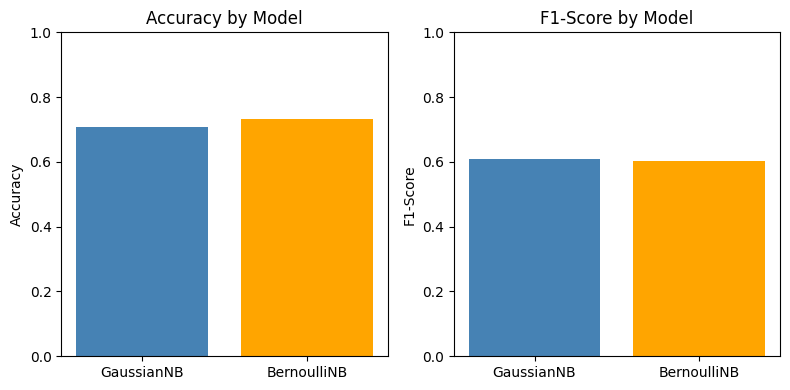

In [13]:
models = ['GaussianNB', 'BernoulliNB']
accuracies = [acc_gnb, acc_bnb]
f1_scores = [f1_gnb, f1_bnb]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['steelblue', 'orange'])
plt.title('Accuracy by Model')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(models, f1_scores, color=['steelblue', 'orange'])
plt.title('F1-Score by Model')
plt.ylim(0, 1)
plt.ylabel('F1-Score')

plt.tight_layout()
plt.show()